In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy.stats import t,ttest_1samp,ttest_ind
from scipy.stats import t , skewnorm , skew , norm , ttest_1samp , ttest_ind

from numpy.random import seed
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [48]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [49]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [50]:
print(df.columns)


Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [51]:
pd.isnull(df).sum()


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Text(0.5, 1.0, 'Popularity Distribution')

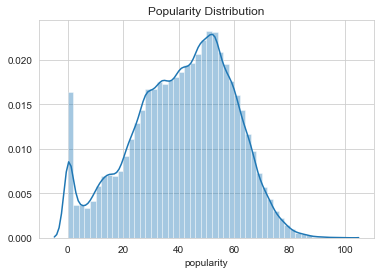

In [52]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'Popularity Based on Time Signature')

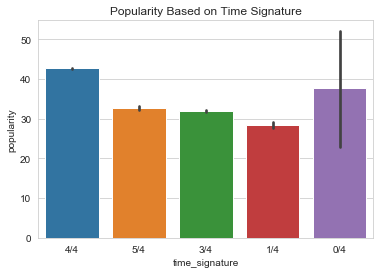

In [53]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

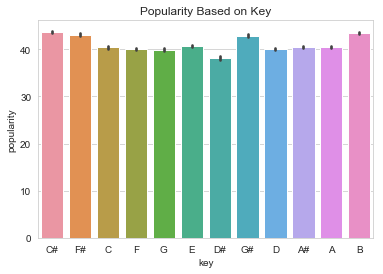

In [54]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

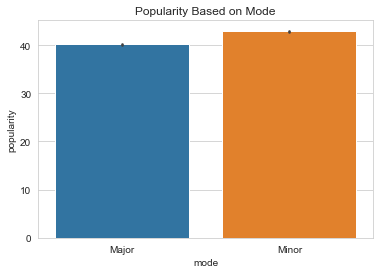

In [55]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

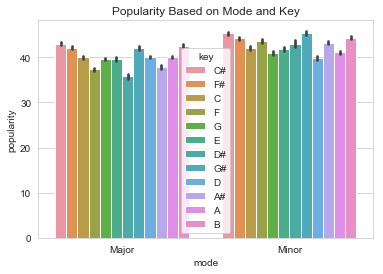

In [56]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

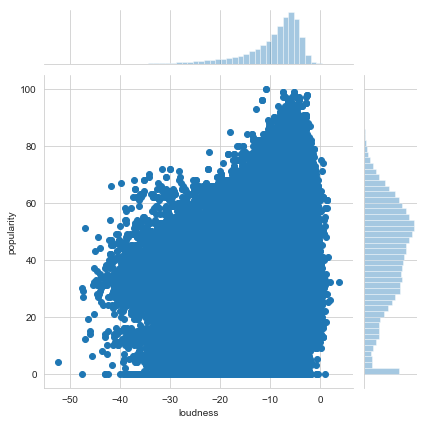

In [57]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)


In [58]:
# sns.lineplot(x = 'loudness', y = 'popularity', data = df)


Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

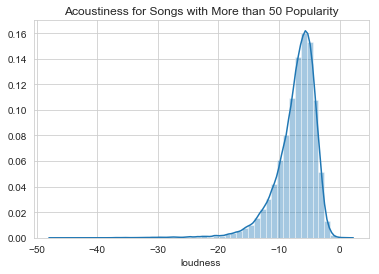

In [59]:
popular_above_50 = df[df.popularity > 50]
sns.distplot(popular_above_50['loudness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

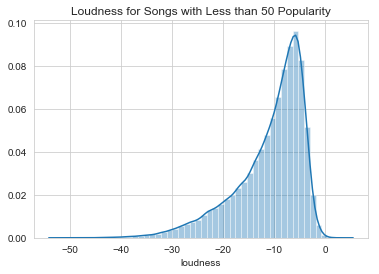

In [60]:
popular_below_50 = df[df.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

In [61]:
# let us do a hypothesis testing to conclude whether the difference 
# between the major and minor difference is statistically significant
p1=df[df['mode']=='Major'].popularity
p2=df[df['mode']=='Minor'].popularity

In [62]:
def data_sampler(data,n):
    return np.random.choice(data,n)

In [63]:
p1.shape

(151744,)

In [64]:
p2.shape

(80981,)

In [65]:
sample0=[np.mean(data_sampler(p1,50)) for _ in np.arange(50000)]
sample1=[np.mean(data_sampler(p2,50)) for _ in np.arange(50000)]

In [66]:
print(ttest_ind(sample0,sample1, equal_var=False))

Ttest_indResult(statistic=-167.25652736982295, pvalue=0.0)


In [67]:
# null hypothesis = not a difference between means of two types of songs 
# alternate hypothesis = a significant sifference between means of two tpes of songs 
# now we can see that our p value is 0.0 then we reject the null hypothesis and conclude that there is a significant difference in means.

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

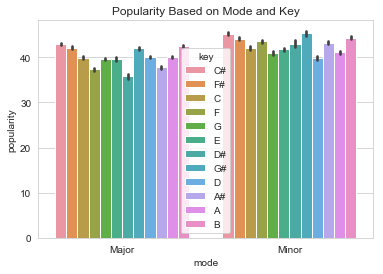

In [68]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

In [69]:
df[df['popularity']==0]['track_name'].count()

6312

In [70]:
# i can use linear regression here to classify popularity of songs .
# for eg :- songs below a threshold and songs above threshold


#two catagories of songs min popu, max popou -----> conduct a t test

{'whiskers': [<matplotlib.lines.Line2D at 0x1db91b25e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1db91b2f588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db91b25cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1db91b2fc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db91b38048>],
 'means': []}

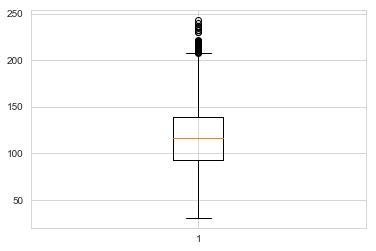

In [71]:
plt.boxplot(df['tempo'])

In [72]:

iqr=np.percentile(df['tempo'],75)-np.percentile(df['tempo'],25)
iqr

46.095

In [73]:
np.mean(df['tempo'])+1.5*iqr
np.mean(df['tempo'])-1.5*iqr

48.524084892039966

In [74]:
df[df['tempo']<48.524]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
54,Movie,Jean Piat,L'Âne chargé d'éponges et l'Âne chargé de sel,2BF5SlaZRL0sYUDBgwjmbo,0,0.92400,0.6830,101653,0.1470,0.000000,G#,0.6060,-21.998,Major,0.8220,32.244,4/4,0.5950
567,A Capella,Peter Hollens,December Song [Bonus Track] - A Capella,0FXAP0YeMzfgPQpLp5ZTOv,18,0.86100,0.1850,238053,0.3940,0.000005,F#,0.0949,-3.555,Major,0.0324,45.957,4/4,0.1910
609,A Capella,The Singers Unlimited,Indian Summer,3iajmwxfwsScVIHVIoyNcd,9,0.98300,0.2990,176523,0.1290,0.000135,C,0.0995,-18.478,Major,0.0301,37.861,4/4,0.0958
1827,Alternative,Florence + The Machine,Jenny of Oldstones (Game of Thrones),1u0THw5xaGd7sYzJEh48Lt,66,0.93100,0.2700,188639,0.1950,0.000010,C#,0.0949,-10.653,Minor,0.0797,46.489,4/4,0.1710
4992,Alternative,Earl Sweatshirt,Wool,228nYWqXzsBS9Ha0SIpM7q,53,0.34700,0.7320,153120,0.4730,0.000000,C#,0.3660,-7.197,Major,0.2710,47.811,4/4,0.3940
6484,Alternative,Earl Sweatshirt,Red Water,6GsLY75eZHnOAWFqdKmZ4b,50,0.51300,0.5800,104427,0.7220,0.000000,C#,0.4050,-5.686,Major,0.2710,47.917,5/4,0.7770
11205,Alternative,Deftones,Phantom Bride,33qrQEXQJg4uk6k8fZgoOa,46,0.01580,0.2660,293053,0.6540,0.497000,A,0.1100,-6.438,Major,0.0466,47.730,3/4,0.2850
20796,Dance,SoMo,Just A Man,6FO4qmWqhavG6VKMVXQMGA,48,0.21900,0.2940,249440,0.4570,0.000000,G,0.1170,-6.888,Major,0.0395,44.573,4/4,0.2240
25838,Electronic,DJ Shadow,Transmission 1,78oBdUBhJ0eCv8B1ONWw7c,35,0.60900,0.2790,35107,0.4230,0.968000,C,0.1840,-15.598,Major,0.0398,46.310,4/4,0.6100
27075,Electronic,Boards of Canada,Jacquard Causeway,7Dw7RRCKnPBlbmHteZ8Whw,38,0.45900,0.3010,395090,0.5390,0.880000,G,0.2170,-11.037,Major,0.1520,35.551,4/4,0.1660


In [75]:
# such a low tempo !!!